### Taking average of each bundle for dki_fa

In [155]:
import afqinsight as ai 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
nodes = pd.read_csv('combined_tract_profiles.csv')

In [157]:
buddles = sorted(list(set(nodes["tractID"])))
buddles

['ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R']

In [158]:
len(nodes)/100

10812.0

In [159]:
subject = set(nodes['subjectID'])
subject_sorted = sorted(list(subject))
node_avg = np.zeros((len(subject), 18)) 

In [160]:
len(subject_sorted)

641

In [161]:
nodes.values

array([[0, 0, 'ATR_R', ..., 0.2273295206146365, 'CC110037', 'unknown'],
       [1, 1, 'ATR_R', ..., 0.2909934627462733, 'CC110037', 'unknown'],
       [2, 2, 'ATR_R', ..., 0.34330491440191063, 'CC110037', 'unknown'],
       ...,
       [1797, 1797, 'FP', ..., 0.3957866784036096, 'CC723395', 'unknown'],
       [1798, 1798, 'FP', ..., 0.3439415171193152, 'CC723395', 'unknown'],
       [1799, 1799, 'FP', ..., 0.22314313490421814, 'CC723395',
        'unknown']], dtype=object)

In [162]:
from numpy import nanmean

In [163]:
node_avg = nodes.groupby(['tractID', 'subjectID']).agg(nanmean)

In [164]:
node_avg.head()

Unnamed: 0  Unnamed: 0.1  nodeID    dki_md    dki_fa  \
tractID subjectID                                                         
ARC_L   CC110037       1349.5        1349.5    49.5  0.000875  0.531603   
        CC110045        449.5         449.5    49.5  0.000812  0.473405   
        CC110056       1349.5        1349.5    49.5  0.000873  0.511041   
        CC110069       1049.5        1049.5    49.5  0.000844  0.534217   
        CC110087       1349.5        1349.5    49.5  0.000835  0.536034   

                     dti_md    dti_fa  
tractID subjectID                      
ARC_L   CC110037   0.000606  0.541153  
        CC110045   0.000587  0.467150  
        CC110056   0.000644  0.514272  
        CC110069   0.000592  0.533889  
        CC110087   0.000605  0.541484

In [165]:
node_avg["dki_fa"]

tractID  subjectID
ARC_L    CC110037     0.531603
         CC110045     0.473405
         CC110056     0.511041
         CC110069     0.534217
         CC110087     0.536034
                        ...   
UNC_R    CC722542     0.433867
         CC722651     0.436832
         CC722891     0.424027
         CC723197     0.457158
         CC723395     0.438148
Name: dki_fa, Length: 10812, dtype: float64

In [166]:
node_avg.loc["ARC_L", :]

,Unnamed: 0,Unnamed: 0.1,nodeID,dki_md,dki_fa,dti_md,dti_fa
subjectID,,,,,,,
CC110037,1349.5,1349.5,49.5,0.000875,0.531603,0.000606,0.541153
CC110045,449.5,449.5,49.5,0.000812,0.473405,0.000587,0.467150
CC110056,1349.5,1349.5,49.5,0.000873,0.511041,0.000644,0.514272
CC110069,1049.5,1049.5,49.5,0.000844,0.534217,0.000592,0.533889
CC110087,1349.5,1349.5,49.5,0.000835,0.536034,0.000605,0.541484
...,...,...,...,...,...,...,...
CC722542,1349.5,1349.5,49.5,0.000931,0.462032,0.000682,0.466488
CC722651,1349.5,1349.5,49.5,0.000866,0.526428,0.000636,0.533537
CC722891,1349.5,1349.5,49.5,0.000890,0.526277,0.000623,0.549324


In [167]:
dki_fa = pd.merge(node_avg.loc["ARC_L", :], node_avg.loc["ARC_R", :], on="subjectID", how="outer")[["dki_fa_x", "dki_fa_y"]]

In [168]:
dki_fa = dki_fa.rename(columns={"dki_fa_x": "ARC_L", "dki_fa_y": "ARC_R"})

In [169]:
for bundle in buddles[2:]:
    dki_fa = pd.merge(dki_fa, node_avg.loc[bundle, "dki_fa"], on="subjectID", how="outer").rename(columns={"dki_fa": bundle})

In [170]:
df.columns

Index(['Observations', 'age', 'hand', 'gender_text', 'gender_code',
       'tiv_cubicmm'],
      dtype='object')

In [173]:
all_data = pd.merge(dki_fa, df, left_on="subjectID", right_on="Observations", how="outer")

In [172]:
all_data.head()

,ARC_L,ARC_R,ATR_L,ATR_R,CGC_L,CGC_R,CST_L,CST_R,FA,FP,...,SLF_L,SLF_R,UNC_L,UNC_R,Observations,age,hand,gender_text,gender_code,tiv_cubicmm
0,0.531603,0.497511,0.502047,0.489271,0.572003,0.550535,0.614231,0.603242,0.599873,0.647528,...,0.498810,0.500785,0.470493,0.468515,CC110037,18.0,89.0,MALE,1.0,1386581.0
1,0.473405,0.560853,0.510568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.495644,0.466559,0.351135,0.447855,CC110045,24.0,100.0,FEMALE,2.0,1385355.0
2,0.511041,0.494669,0.449602,0.455286,0.514784,0.514787,0.579294,0.564310,0.532147,0.596100,...,0.472566,0.492299,0.460681,0.446165,CC110056,22.0,100.0,FEMALE,2.0,1286849.0
3,0.534217,0.519571,0.486667,0.474256,0.473111,0.444506,0.551477,0.537662,0.515360,NaN,...,0.486463,0.484663,0.374391,0.458155,CC110069,28.0,-58.0,FEMALE,2.0,1416433.0
4,0.536034,0.515944,0.455593,0.450075,0.533372,0.527291,0.595462,0.576944,0.548062,0.602859,...,0.516532,0.491975,0.444708,0.430704,CC110087,28.0,100.0,FEMALE,2.0,1309651.0


In [86]:

for i in range(len(subject_sorted)):
    for j in range(len(buddles)):
        sub = subject_sorted[i]
        bud = buddles[j]
        nodes_sub_tract = nodes.loc[(nodes['subjectID'] == 'sub') & (nodes['tractID'] == 'bud')]
        nodes_avg_sub_tract = pd.Series.mean(nodes_sub_tract['dki_fa'])
        node_avg[i, j] = nodes_avg_sub_tract

KeyboardInterrupt: 

In [30]:
df=pd.read_csv('participant_data.tsv', sep='\t')

In [56]:
len(set(df['Observations']))

652

In [175]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
dki_fa_imp = imputer.fit_transform(dki_fa)

Text(0, 0.5, 'averaged values')

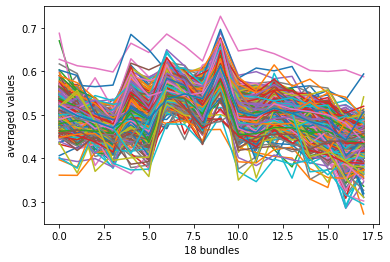

In [176]:
plt.plot(dki_fa_imp[:, :].T)
plt.xlabel('18 bundles')
plt.ylabel('averaged values')

### NMF with 2 components

In [148]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(dki_fa_imp)
H = model.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [184]:
W.shape
#H.shape

(641, 2)

In [150]:
H.shape

(2, 18)

In [151]:
W@H

array([[0.55047302, 0.53012567, 0.52146087, ..., 0.50598339, 0.46690589,
        0.46908155],
       [0.51347012, 0.49742427, 0.49552874, ..., 0.47835247, 0.4340408 ,
        0.4350451 ],
       [0.5211155 , 0.49979787, 0.48726056, ..., 0.47452765, 0.44304176,
        0.4458196 ],
       ...,
       [0.48783542, 0.46867441, 0.45861476, ..., 0.44595254, 0.41434666,
        0.41666923],
       [0.48593161, 0.46852696, 0.46205277, ..., 0.44786989, 0.41188156,
        0.41360749],
       [0.52452307, 0.49776534, 0.47396767, ..., 0.46610068, 0.44861214,
        0.45326031]])

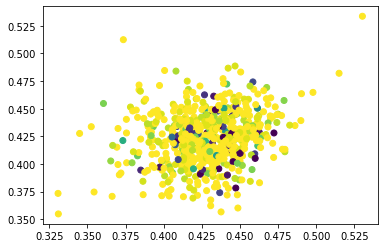

In [212]:
fig, ax = plt.subplots()
ax.scatter(W[:, 0], W[:, 1], c = all_data.loc[:640, 'hand'], cmap = 'viridis')
# add age as color


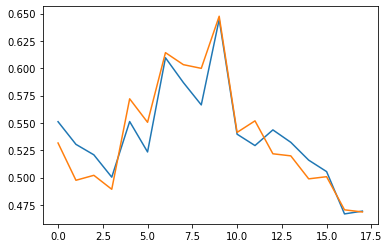

In [212]:
fig, ax = plt.subplots()
ax.plot(W[0, :]@H)
ax.plot(node_avg_imp[0, :])

### PCA with 2 components

In [190]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
pca_2 = PCA(n_components=2)
#dki_fa_imp_nor = scaler.fit_transform(dki_fa_imp)
x_2 = pca_2.fit_transform(dki_fa_imp)

In [191]:
c = pca_2.components_

Text(0.5, 1.0, '')

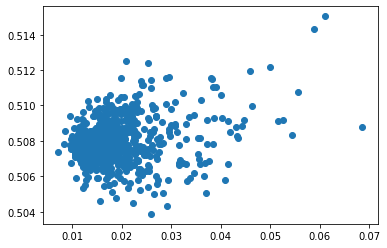

In [192]:
loss_nmf_2 = []
loss_pca_2 = []
for i in range(641):
    loss_nmf_2.append(np.sqrt(np.mean(((W[i, :]@H)-dki_fa_imp[i, :])**2)))
    loss_pca_2.append(np.sqrt(np.mean(((x_2[i, :]@c)-dki_fa_imp[i, :])**2)))
fig1, ax1 = plt.subplots()
ax1.scatter(loss_nmf_2, loss_pca_2)

ax1.title
# compare loss b/w nmp & pca, scatterplot loss of these two

### NMF with 3 components

In [193]:
from sklearn.decomposition import NMF
model_3 = NMF(n_components=3, init='random', random_state=0)
W_3 = model_3.fit_transform(dki_fa_imp)
H_3 = model_3.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [195]:
W_3.shape

(641, 3)

In [196]:
H_3.shape

(3, 18)

### PCA with 3 components

In [200]:

#scaler = StandardScaler()
pca_3 = PCA(n_components=2)
#dki_fa_imp_nor = scaler.fit_transform(dki_fa_imp)
x_3 = pca_3.fit_transform(dki_fa_imp)

In [201]:
c_3 = pca_3.components_

TypeError: 'Text' object is not callable

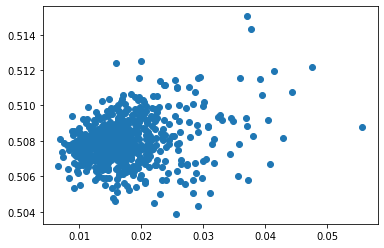

In [202]:
loss_nmf_3 = []
loss_pca_3 = []
for i in range(641):
    loss_nmf_3.append(np.sqrt(np.mean(((W_3[i, :]@H_3)-dki_fa_imp[i, :])**2)))
    loss_pca_3.append(np.sqrt(np.mean(((x_3[i, :]@c_3)-dki_fa_imp[i, :])**2)))
fig2, ax2 = plt.subplots()
ax2.scatter(loss_nmf_3, loss_pca_3)

ax2.title('loss comparasion b/w PCA & NMF')
# compare loss b/w nmp & pca, scatterplot loss of these two

### NMF with 4 components

In [203]:
from sklearn.decomposition import NMF
model_4 = NMF(n_components=3, init='random', random_state=0)
W_4 = model_4.fit_transform(dki_fa_imp)
H_4 = model_4.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [204]:
W_4.shape

(641, 3)

In [205]:
H_4.shape

(3, 18)

### PCA with 4 components

In [206]:

#scaler = StandardScaler()
pca_4 = PCA(n_components=2)
#dki_fa_imp_nor = scaler.fit_transform(dki_fa_imp)
x_4 = pca_4.fit_transform(dki_fa_imp)

In [207]:
c_4 = pca_4.components_

Text(0.5, 1.0, 'loss comparasion b/w PCA & NMF')

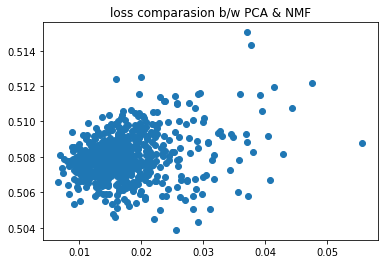

In [210]:
loss_nmf_4 = []
loss_pca_4 = []
for i in range(641):
    loss_nmf_4.append(np.sqrt(np.mean(((W_4[i, :]@H_4)-dki_fa_imp[i, :])**2)))
    loss_pca_4.append(np.sqrt(np.mean(((x_4[i, :]@c_4)-dki_fa_imp[i, :])**2)))
fig4, ax4 = plt.subplots()
ax4.scatter(loss_nmf_4, loss_pca_4)

ax4.set_title('loss comparasion b/w PCA & NMF')
# compare loss b/w nmp & pca, scatterplot loss of these two